# Gütebewertung von Prognosemodellen
### Präsentation Stefan Rohmer
#### - experimentell -

In [1]:
### Lade Libraries und Packages

#### Modifiziere Jupyter
from ipywidgets import interact, fixed
from IPython.display import Image

#### Unterdrücke Warnings
import warnings
warnings.filterwarnings('ignore')
#### Importiere Standardbibliotheken
import numpy as np
import pandas as pd
from scipy.stats import truncnorm as trn
#### Importiere Plotting Bibliotheken
import matplotlib.pyplot as plt
import seaborn as sns

# Grundlagen

#### Ziel eines Prognosemodells ist es:

 -  den Zusammenhang zwischen Input und Output Variablen zu modellieren

 - anhand zukünftiger Inputs zukünftige Outputs zu prognostizieren

#### In unserem Fall: Binäre Klassifikation

 - Zwei Klassen (1 und 0)

 - Für das weitere Vorgehen: Erstellung eines binären 'Fake Modells'

In [2]:
# Eine Klassifizierung ist ein Versuch, die in einem Datensatz vorhandenen Klassen zu trennen
def FakeModell(mean_t = 0.5, mean_f = 0.5, std = 0.1, clip_a = 0, clip_b = 1, size_t = 1000, size_f = 1000):
    at, bt = (clip_a - mean_t) / std, (clip_b - mean_t) / std
    af, bf = (clip_a - mean_f) / std, (clip_b - mean_f) / std

    x_true = trn.rvs(at, bt, mean_t, std, size = size_t)
    x_true1 = np.ones(1000)
    x_false = trn.rvs(af, bf, mean_f, std, size = size_f)
    x_false1 = np.zeros(1000)

    X = pd.DataFrame(np.append(arr=x_true, values=x_false))
    X[1] = pd.DataFrame(np.append(arr=x_true1, values=x_false1))
    
    return X, x_true, x_false

In [3]:
def figGen(TrueMean = 0.5, FalseMean = 0.5, threshold = 0.5):
    plt.Figure(figsize=[40, 40])
    plt.xlim(0,1)
    
    X, x_true, x_false = FakeModell(TrueMean, FalseMean)
    sns.distplot(x_true, hist=False, label='Positive Werte')
    sns.distplot(x_false, hist=False, label='Negative Werte')
    plt.axvline(threshold, color='r')
    return plt.show()


#### Mit diesem 'Fake Modell' lassen sich positive und negative Werte trennen

In [4]:
i1 = interact(figGen, TrueMean = 0.5, FalseMean = 0.5, threshold=fixed(0))

interactive(children=(FloatSlider(value=0.5, description='TrueMean', max=1.5, min=-0.5), FloatSlider(value=0.5…

#### Backup

In [27]:
# Eine Klassifizierung ist ein Versuch, die in einem Datensatz vorhandenen Klassen zu trennen
size_t = 1000
size_f = 1000
def FakeModell(mean_t = 0.5, mean_f = 0.5, std = 0.1, clip_a = 0, clip_b = 1, size_t = size_t, size_f = size_f):
    at, bt = (clip_a - mean_t) / std, (clip_b - mean_t) / std
    af, bf = (clip_a - mean_f) / std, (clip_b - mean_f) / std

    x_true = trn.rvs(at, bt, mean_t, std, size = size_t)
    x_true1 = np.ones(size_t)
    x_false = trn.rvs(af, bf, mean_f, std, size = size_f)
    x_false1 = np.zeros(size_f)

    X = pd.DataFrame(np.append(arr=x_true, values=x_false))
    X[1] = pd.DataFrame(np.append(arr=x_true1, values=x_false1))
    
    return X, x_true, x_false

In [6]:
def figGen(TrueMean = 0.5, FalseMean = 0.5, threshold = 0.5):
    plt.Figure(figsize=[40, 40])
    plt.xlim(0,1)
    
    X, x_true, x_false = FakeModell(TrueMean, FalseMean)
    sns.distplot(x_true, hist=False, label='Positive Werte')
    sns.distplot(x_false, hist=False, label='Negative Werte')
    plt.axvline(threshold, color='r')
    return plt.show()


# Kennzahlen

Zur Gütebewertung vergleichen wir anschließend die Prognosewerte mit den tatsächlichen Werten

#### Die Prognosewerte ermitteln wir mit Hilfe eines Schwellwertes

In [28]:
i2 = interact(figGen, TrueMean = 0.8, FalseMean = 0.4, threshold=0.5)

interactive(children=(FloatSlider(value=0.8, description='TrueMean', max=2.4000000000000004, min=-0.8), FloatS…

In [8]:
# Stats
def statsGen(TrueMean = 0.5, FalseMean = 0.5, threshold = 0.5, printer=0):
    X, x_true, x_false = FakeModell(TrueMean, FalseMean)
    
    p = len(X[X[0] >= threshold]) # Klassifiziert alle Werte über dem Grenzwert als positiv
    n = len(X[X[0] < threshold])  # Klassifiziert alle Werte unter dem Grenzwert als negativ

    tp = len(X[(X[1]==1) & (X[0] >= threshold)]) # Berechnet die Anzahl 'wahrer' positiv-Klassifizierungen
    fp = len(X[(X[1]==0) & (X[0] >= threshold)]) # Berechnet die Anzahl 'falscher' positiv-Klassifizierungen
    tn = len(X[(X[1]==0) & (X[0] < threshold)])  # Berechnet die Anzahl 'wahrer' negativ-Klassifizierungen
    fn = len(X[(X[1]==1) & (X[0] < threshold)])  # Berechnet die Anzahl 'falscher' negativ-Klassifizierungen
    if printer == 0:
        return p, n, tp, fp, tn, fn, X, x_true, x_false
    if printer == 1:    
        print('%d Fälle wurden richtigerweise positiv klassifiziert' % tp)
        print('%d Fälle wurden falscherweise positiv klassifiziert' % fp)
        print('%d Fälle wurden richtigerweise negativ klassifiziert' % tn)
        print('%d Fälle wurden falscherweise negativ klassifiziert' % fn)

In [9]:
p, n, tp, fp, tn, fn, X, x_true, x_false = statsGen()

#### Der Schwellwert führt dazu, dass die Werte klassifiziert werden

In [10]:
i3 = interact(statsGen, X=fixed(X), threshold=0.5, printer = fixed(1));

interactive(children=(FloatSlider(value=0.5, description='TrueMean', max=1.5, min=-0.5), FloatSlider(value=0.5…

#### Confusion Matrix
##### Im binären Fall führt das zu einer 2x2 Confusion Matrix

![title](Images/Confusion_matrix.png)

\\( Accuracy = \frac{tp + tn}{tp+tn+fp+fn} \hspace{0.8cm}\\) Allgemeine Prognosegenauigkeit

\\( Precision = \frac{tp}{tp+fp} \hspace{1.7cm}\\) Richtig klassifizierte positive Prognosewerte

\\( Sensitivity = \frac{tp}{tp+fn} \hspace{1.6cm}\\) Positive Werte, richtig klassifiziert (Recall, True Positive Rate)

\\( Specificity = \frac{tn}{tn+fp} \hspace{1.5cm}\\) Negative Werte, richtig klassifiziert (True Negative Rate)

In [11]:
# Metriken
def metricGen(TrueMean = 0.5, FalseMean = 0.5, threshold = 0.5, printer=0):
    p, n, tp, fp, tn, fn, X, x_true, x_false = statsGen(TrueMean, FalseMean, threshold)
    Sensitivity = tp/len(x_true)  # Berechnet Sensitivity-Kennzahl
    Specificity = tn/len(x_false) # Berechnet Specificity-Kennzahl
    Accuracy = (tp + tn) / len(X) # Berechnet Accuracy-Kennzahl
    if p != 0:                    # Berechnet Precision-Kennzahl
        Precision = tp/p 
    else:
        Precision = 0
    if printer == 0:
        return Sensitivity, Specificity, Precision, Accuracy
    if printer == 1:
        print('Accuracy: '+'{:.2%}'.format(Accuracy))
        print('Sensitivity: '+'{:.2%}'.format(Sensitivity))
        print('Specificity: '+'{:.2%}'.format(Specificity))
        print('Precision: '+'{:.2%}'.format(Precision))
        

In [12]:

i4 = interact(metricGen, TrueMean = 0.5, FalseMean = 0.5, threshold = 0.5, printer = fixed(1));

interactive(children=(FloatSlider(value=0.5, description='TrueMean', max=1.5, min=-0.5), FloatSlider(value=0.5…

Ein Modell das die Klassen besser trennt, schneidet besser ab. 
Mit dem Schwellwert können einzelne Kennzahlen optimiert werden.

#### Probleme?

#### Kommt auf Usecase an! Aufpassen wenn:


 - Klassen nicht mit gleicher Häufigkeit im Datensatz vertreten sind


 - Oder hohe Kosten durch falsche Prognose entstehen


 - Probleme treten auf, wenn in die Kennzahl positive UND negative Grundgesamtheit eingeht 

![title](Images/Confusion_matrix.png)

#### Backup

In [13]:
# Stats
def statsGen(TrueMean = 0.5, FalseMean = 0.5, threshold = 0.5, printer=0):
    X, x_true, x_false = FakeModell(TrueMean, FalseMean)
    
    p = len(X[X[0] >= threshold]) # Klassifiziert alle Werte über dem Grenzwert als positiv
    n = len(X[X[0] < threshold])  # Klassifiziert alle Werte unter dem Grenzwert als negativ

    tp = len(X[(X[1]==1) & (X[0] >= threshold)]) # Berechnet die Anzahl 'wahrer' positiv-Klassifizierungen
    fp = len(X[(X[1]==0) & (X[0] >= threshold)]) # Berechnet die Anzahl 'falscher' positiv-Klassifizierungen
    tn = len(X[(X[1]==0) & (X[0] < threshold)])  # Berechnet die Anzahl 'wahrer' negativ-Klassifizierungen
    fn = len(X[(X[1]==1) & (X[0] < threshold)])  # Berechnet die Anzahl 'falscher' negativ-Klassifizierungen
    if printer == 0:
        return p, n, tp, fp, tn, fn, X, x_true, x_false
    if printer == 1:    
        print('%d Fälle wurden richtigerweise positiv klassifiziert' % tp)
        print('%d Fälle wurden falscherweise positiv klassifiziert' % fp)
        print('%d Fälle wurden richtigerweise negativ klassifiziert' % tn)
        print('%d Fälle wurden falscherweise negativ klassifiziert' % fn)

In [14]:
# Metriken
def metricGen(tp = tp, tn = tn, p = p, x_true = x_true, x_false = x_false, X = X, printer=0):
    
    Sensitivity = tp/len(x_true)  # Berechnet Sensitivity-Kennzahl
    Specificity = tn/len(x_false) # Berechnet Specificity-Kennzahl
    Accuracy = (tp + tn) / len(X) # Berechnet Accuracy-Kennzahl
    if p != 0:                    # Berechnet Precision-Kennzahl
        Precision = tp/p 
    else:
        Precision = 0
    if printer == 1:
        print('Sensitivity: '+'{:.2%}'.format(Sensitivity))
        print('Specificity: '+'{:.2%}'.format(Specificity))
        print('Precision: '+'{:.2%}'.format(Precision))
        print('Accuracy: '+'{:.2%}'.format(Accuracy))
    
    return Sensitivity, Specificity, Precision, Accuracy


# Gain

...bezieht sich auf den vertretenen Anteil der vorhergesagten Klasse in sortierten Abschnitten des Datensatzes   

#### Business Case

 - Angenommen wir können maximal 2000 Kunden anschreiben

 - Wir wissen aber, dass nur 1000 Kunden antworten

 -  Idealerweise schreiben wir nur diese Kunden an

#### Vorgehen

 - Mit unserem Prognosemodell trennen wir die Klassen voneinander

 - Den resultierenden Datensatz sortieren wir nach den prognostizierten Wahrscheinlichkeiten

 - Für die einzelnen Abschnitte des Datensatzes zählen wir den (kumulativen) Anteil der positiven Werte

#### In der Funktion machen wir genau das

In [15]:
def gainGen(TrueMean = 0.5, FalseMean = 0.5):
    
    gain = []
    X, x_true, x_false = FakeModell(TrueMean, FalseMean)
    X.sort_values(by=0, ascending=False, inplace=True) # Sortiert X nach den berechneten Wahrscheinlichkeiten
    for i in range(1,len(X)):   # Berechnet die Summe aller positiven Werte im jeweiligen Bereich
        a = (X[1].head(i).sum())/len(x_true)
        gain.append([(i/len(X)), a])
    return plt.plot(*zip(*gain))

#### Das Resultat ist ein Cumulative Gains Chart

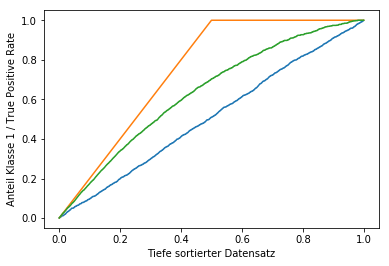

In [16]:
plt.figure()
plt.xlabel('Tiefe sortierter Datensatz')
plt.ylabel('Anteil Klasse 1 / True Positive Rate')

gainGen() 
gainGen(0.9, 0.1)
gainGen(0.6)

 - Was bedeuten die unterschiedlichen Kurven?
 - Warum ist die orangene Kurve eckig?

#### Probleme?

![title](Images/gains_vs_roc.jpg)

#### Gains-Konzept verwendet positive und negative Werte in X-Achse
 - Vorsicht, wenn unterschiedliche Klassengrößen!
 - Vorsicht, wenn hohe Kosten für falsche Klassifizierung!

#### Backup

In [17]:
def gainGen(TrueMean = 0.5, FalseMean = 0.5):
    
    gain = []
    X, x_true, x_false = FakeModell(TrueMean, FalseMean)
    X.sort_values(by=0, ascending=False, inplace=True) # Sortiert X nach den berechneten Wahrscheinlichkeiten
    for i in range(1,len(X)):   # Berechnet die Summe aller positiven Werte im jeweiligen Bereich
        a = (X[1].head(i).sum())/len(x_true)
        gain.append([(i/len(X)), a])
    return plt.plot(*zip(*gain))

# Lift

...bezieht sich auf die Performance des Prognosemodells in Relation zu einer Baselineperformance (Random Guess)

#### Business Case

 - Angenommen wir können maximal 2000 Kunden anschreiben

 - Wir wissen aber, dass nur 1000 Kunden antworten

 -  Idealerweise schreiben wir nur diese Kunden an

#### Vorgehen

 - Mit unserem Prognosemodell trennen wir die Klassen voneinander

 - Den resultierenden Datensatz sortieren wir nach den prognostizierten Wahrscheinlichkeiten

 - Für die einzelnen Abschnitte des Datensatzes berechnen wir die (kumulative) True Positive Rate

 - Diese setzen wir in Relation zu unserem Benchmark (Raten)

#### In der Funktion machen wir genau das

In [18]:
def liftGen(TrueMean = 0.5, FalseMean = 0.5):
    
    lift = []
    X, x_true, x_false = FakeModell(TrueMean, FalseMean)
    X.sort_values(by=0, ascending=False, inplace=True) # Sortiert X nach den berechneten Wahrscheinlichkeiten
    for i in range(200,len(X), 1):   # Hier liegt der Unterschied
        b = (X[1].head(i).sum()/i)/(len(x_true)/len(X)) # Dieses Mal setzen wir die True Positive Rate des Modells
        lift.append([i, b])                             # in Relation zu zufälligem Raten
    return plt.plot(*zip(*lift))

#### Das Resultat ist ein Cumulative Lift Chart

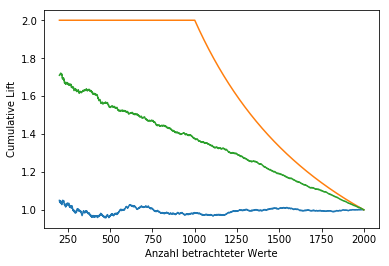

In [19]:
plt.figure()
plt.xlabel('Anzahl betrachteter Werte')
plt.ylabel('Cumulative Lift')
liftGen() 
liftGen(0.9, 0.1)
liftGen(0.6)

 - Was bedeuten die unterschiedlichen Kurven?
 - Warum 'knickt' die orangene Kurve?
 - Woher kommt die starke Volatilität am Anfang?

#### Probleme?

#### Auch das Lift-Konzept verwendet positive und negative Werte in X-Achse
 - Vorsicht, wenn unterschiedliche Klassengrößen!
 - Vorsicht, wenn hohe Kosten für falsche Klassifizierung!
 - Je niedriger die Anzahl positiver Werte an der Grundgesamtheit (Baseline), desto höher der potentielle Lift
 - 50 Prozent: Maximaler Lift = 2    /    0.1 Prozent: Maximaler Lift = 1000

#### Backup

In [20]:
def liftGen(TrueMean = 0.5, FalseMean = 0.5):
    
    lift = []
    X, x_true, x_false = FakeModell(TrueMean, FalseMean)
    X.sort_values(by=0, ascending=False, inplace=True) # Sortiert X nach den berechneten Wahrscheinlichkeiten
    for i in range(200,len(X), 1):   # Berechnet die Summe aller positiven Werte im jeweiligen Bereich
        b = (X[1].head(i).sum()/i)/(len(x_true)/len(X))
        lift.append([i, b])
    return plt.plot(*zip(*lift))

In [21]:
# Stats
X, x_true, x_false = FakeModell()
def statsGen1(threshold = 0.5, x_true = 0.5, x_false = 0.5, X=X, printer=0):
    
    
    p = len(X[X[0] >= threshold]) # Klassifiziert alle Werte über dem Grenzwert als positiv
    n = len(X[X[0] < threshold])  # Klassifiziert alle Werte unter dem Grenzwert als negativ

    tp = len(X[(X[1]==1) & (X[0] >= threshold)]) # Berechnet die Anzahl 'wahrer' positiv-Klassifizierungen
    fp = len(X[(X[1]==0) & (X[0] >= threshold)]) # Berechnet die Anzahl 'falscher' positiv-Klassifizierungen
    tn = len(X[(X[1]==0) & (X[0] < threshold)])  # Berechnet die Anzahl 'wahrer' negativ-Klassifizierungen
    fn = len(X[(X[1]==1) & (X[0] < threshold)])  # Berechnet die Anzahl 'falscher' negativ-Klassifizierungen
    if printer == 1:    
        print('%d Fälle wurden richtigerweise positiv klassifiziert' % tp)
        print('%d Fälle wurden falscherweise positiv klassifiziert' % fp)
        print('%d Fälle wurden richtigerweise negativ klassifiziert' % tn)
        print('%d Fälle wurden falscherweise negativ klassifiziert' % fn)

    return p, n, tp, fp, tn, fn

# Receiver Operating Characteristics (ROC)

...setzt die True Positive Rate in Beziehung zur False Positive Rate

...vermeidet dadurch die Vermischung positiver und negativer Werte im Nenner

#### Anliegen

 - Gain und Lift sind abhängig vom Anteil der Klassen an der Grundgesamtheit

 - Wenn sich der Anteil ändert, ändert sich die Gütebewertung

 -  Wir wollen aber eine Gütebewertung, die gleich bleibt 

#### Vorgehen

 - Mit unserem Prognosemodell trennen wir die Klassen voneinander

 - Für unterschiedliche Schwellwerte berechnen wir die True Positive Rate und die False Positive Rate

 - Diese setzen wir an jedem Schwellwert in Relation zu einander

 - Am Ende können wir mit den einzelnen Punkten eine Kurve zeichnen, sowie die Fläche darunter als Kennzahl ausgeben

#### Zur Veranschaulichung

In [22]:
i5 = interact(figGen, TrueMean = 0.5, FalseMean = 0.5, threshold=0.5)

interactive(children=(FloatSlider(value=0.5, description='TrueMean', max=1.5, min=-0.5), FloatSlider(value=0.5…

Beginnend von 0 können wir den Schwellenwert von links nach rechts bewegen, um unsere ROC Punkte zu berechnen

In [23]:
def rocGen(TrueMean = 0.5, FalseMean = 0.5):
    X, x_true, x_false = FakeModell(TrueMean, FalseMean)
    ROC = []
    
    for i in np.linspace(0.0001, 1, 1000):
        threshold = i
        p, n, tp, fp, tn, fn = statsGen1(threshold, x_true = x_true, X = X, x_false = x_false)
        Sensitivity, Specificity, Precision, Accuracy = metricGen(tp = tp, tn = tn, p = p, x_true = x_true, x_false = x_false, X = X)
        ROC.append([1-Specificity, Sensitivity])

    return plt.plot(*zip(*ROC))



#### Mit den einzelnen ROC Werten lässt sich eine Kurve zeichnen

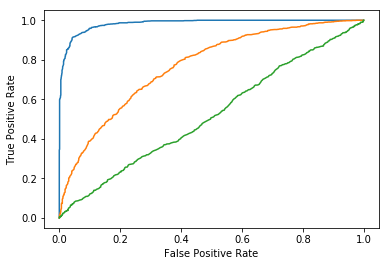

In [24]:
plt.figure()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

rocGen(0.8)
rocGen(0.6)
rocGen(0.5)

 - Was bedeuten die unterschiedlichen Kurven?
 - Wo findet sich der Schwellenwert wieder?

#### Die ROC Kurve zeigt uns unabhängig von den Klassengrößen, wie gut unser Modell die Klassen trennt

In [25]:
i6 = interact(rocGen, TrueMean = 0.5, FalseMean = 0.5)

interactive(children=(FloatSlider(value=0.5, description='TrueMean', max=1.5, min=-0.5), FloatSlider(value=0.5…

Wenn es die Klassen gut trennt, nimmt für einen zunehmenden Schwellenwert die FPR stärker ab als die TPR

#### Letztendlich lässt sich für die ROC Kurve die Area Under Curve (AUC) berechnen

![title](Images/auc2.png)

#### Probleme?

#### Im Gegensatz zu Gain und Lift umgehen ROC und AUC das Problem zweier Klassen im Nenner
 - AUC von 0.9 ist besser als AUC von 0.8
 - Aber was bedeutet das für den konkreten Use-Case?
 - Gütebewertung findet über alle Schwellenwerte statt, auch wenn diese nicht sinnvoll sind
 - Modelle mit gleichem AUC können verschiedenen Gain oder Lift haben

#### Backup

In [26]:
def rocGen(TrueMean = 0.5, FalseMean = 0.5):
    X, x_true, x_false = FakeModell(TrueMean, FalseMean)
    ROC = []
    
    for i in np.linspace(0.0001, 1, 1000):
        threshold = i
        p, n, tp, fp, tn, fn = statsGen1(threshold, x_true = x_true, X = X, x_false = x_false)
        Sensitivity, Specificity, Precision, Accuracy = metricGen(tp = tp, tn = tn, p = p, x_true = x_true, x_false = x_false, X = X)
        ROC.append([1-Specificity, Sensitivity])

    return plt.plot(*zip(*ROC))


# Ende und Diskussion

#### Vielen Dank für die Aufmerksamkeit!
#### Fragen?